Importovanie potrebných knižníc

In [1]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  classification_report
import VisualizeNN as VisNN
plt.style.use('seaborn')


Načítanie datasetu

In [2]:
df = pd.read_csv('data.csv',header=0)

In [3]:

df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


Základné info o datasete

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [5]:
list(df.columns)

['Fever',
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'Diarrhea',
 'None_Experiencing',
 'Age_0-9',
 'Age_10-19',
 'Age_20-24',
 'Age_25-59',
 'Age_60+',
 'Gender_Female',
 'Gender_Male',
 'Gender_Transgender',
 'Severity_Mild',
 'Severity_Moderate',
 'Severity_None',
 'Severity_Severe',
 'Contact_Dont-Know',
 'Contact_No',
 'Contact_Yes',
 'Country']

Zlúčenie niektorých stĺpcov do jedného

In [6]:
severity=[]
gender=[]
age=[]
contact=[]
for index, row in df.iterrows():
    if row['Severity_Severe'] == 1:
        severity.append(3)
    if row['Severity_Moderate'] == 1:
        severity.append(2)
    if row['Severity_Mild'] == 1:
        severity.append(1)
    if row['Severity_None'] == 1:
        severity.append(0) 
    if row['Age_0-9'] == 1:
        age.append(0)
    if row['Age_10-19'] == 1:
        age.append(1) 
    if row['Age_20-24'] == 1:
        age.append(2) 
    if row['Age_25-59'] == 1:
        age.append(3) 
    if row['Age_60+'] == 1:
        age.append(4) 
    if row['Gender_Female'] == 1:
        gender.append(0) 
    if row['Gender_Male'] == 1:
        gender.append(1) 
    if row['Gender_Transgender'] == 1:
        gender.append(2) 
    if row['Contact_Dont-Know'] == 1:
        contact.append(0) 
    if row['Contact_No'] == 1:
        contact.append(1) 
    if row['Contact_Yes'] == 1:
        contact.append(2) 
   


Pridanie stĺpcov do dataframu

In [7]:
df['severity']=severity
df['Age']=age
df['Gender']=gender
df['contact']=contact


C:\Users\mvlca\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


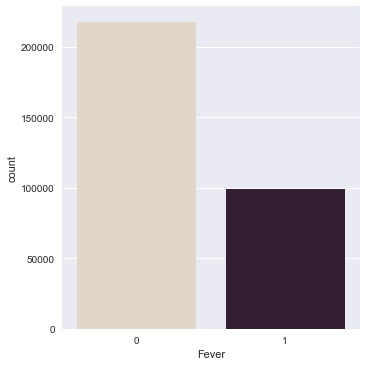

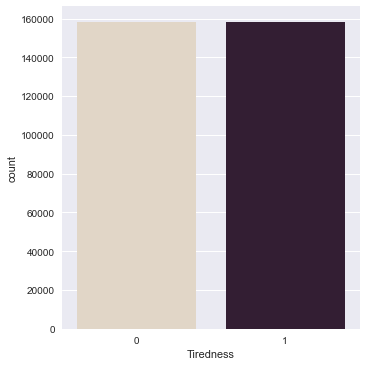

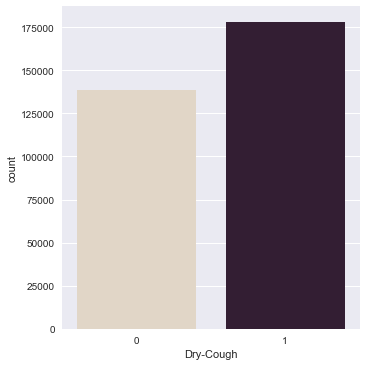

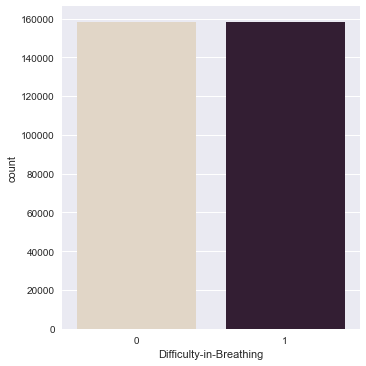

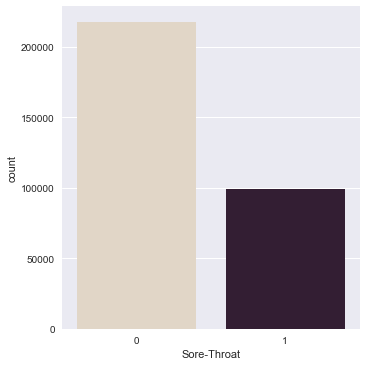

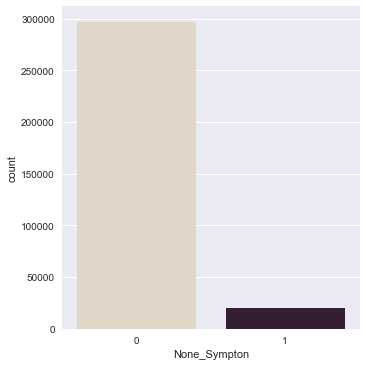

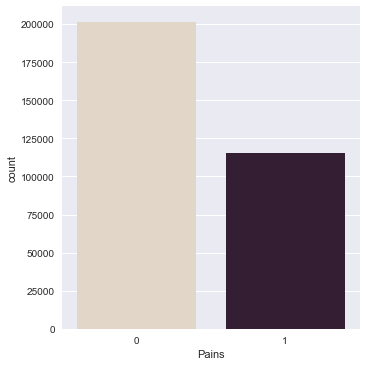

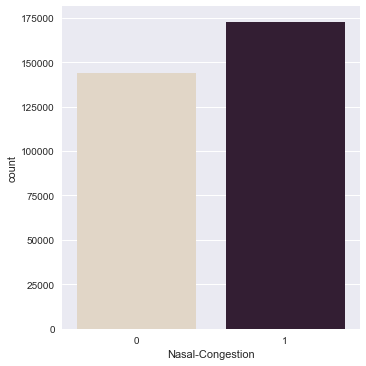

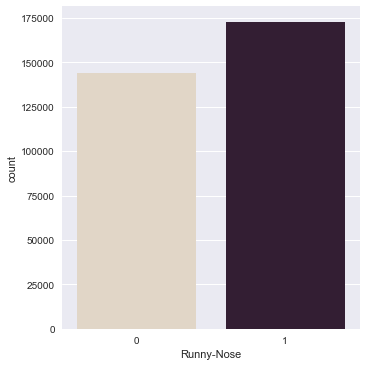

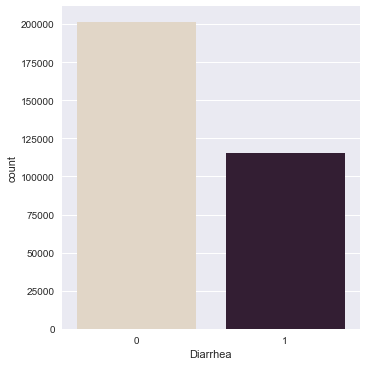

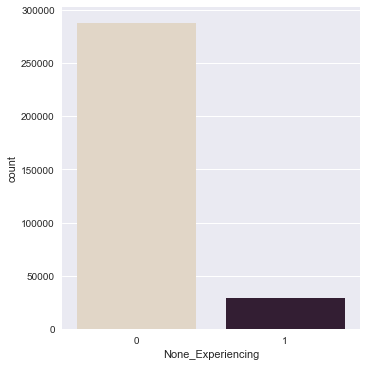

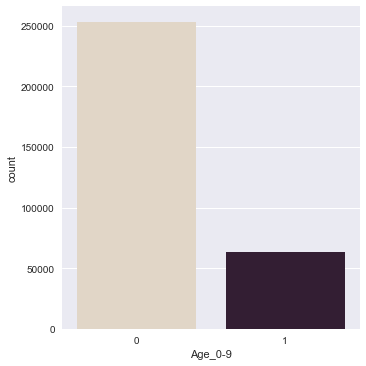

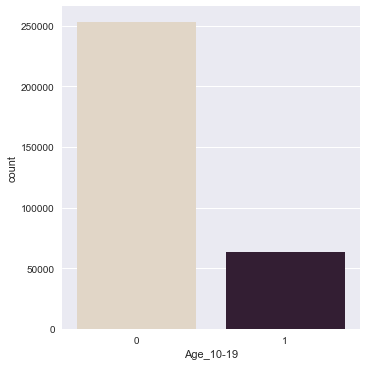

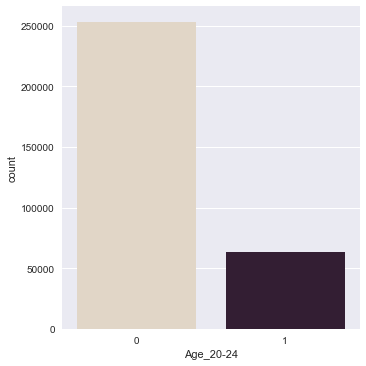

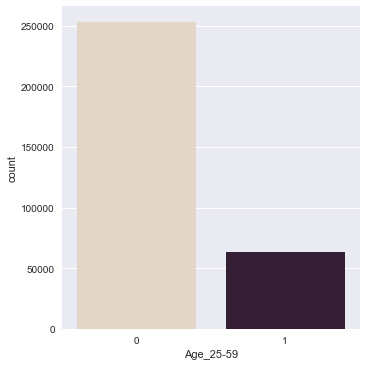

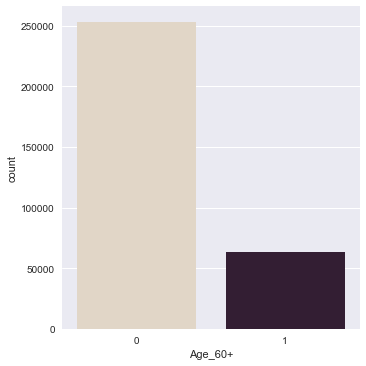

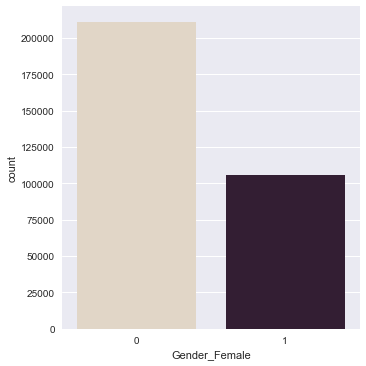

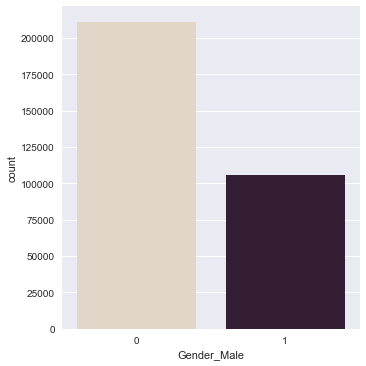

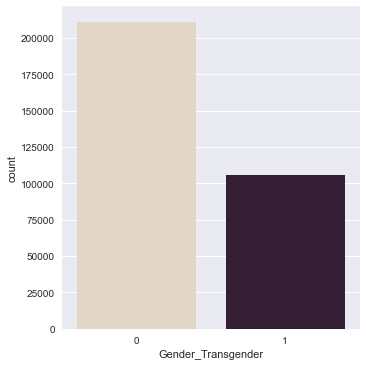

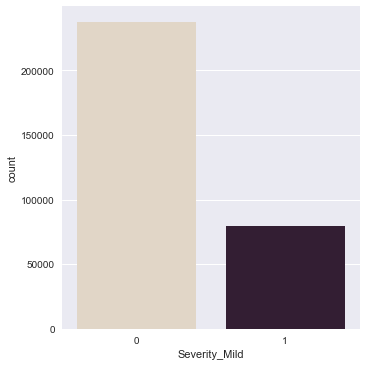

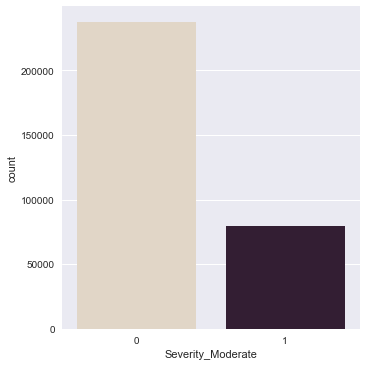

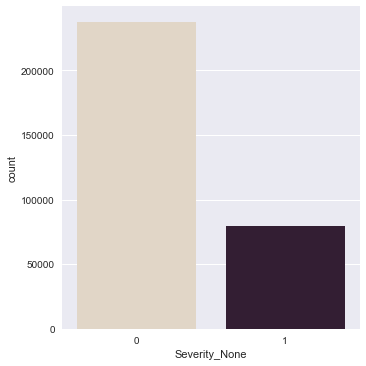

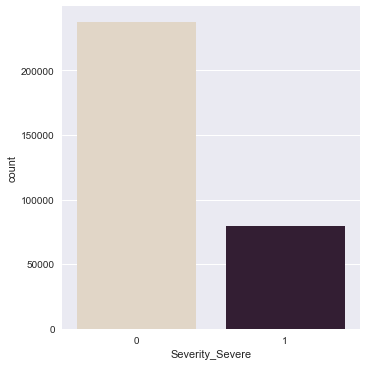

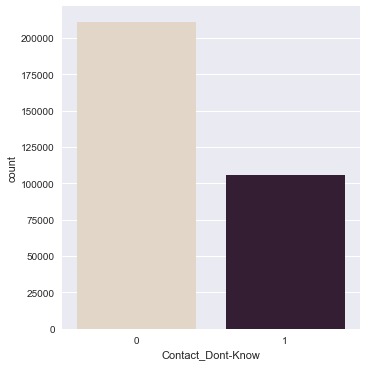

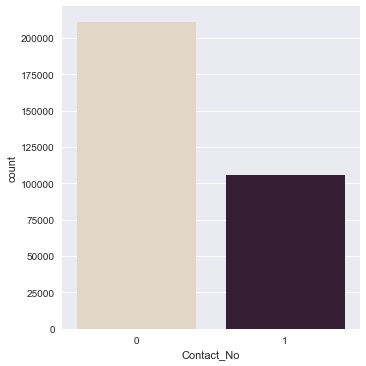

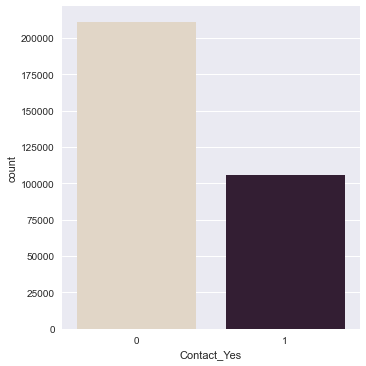

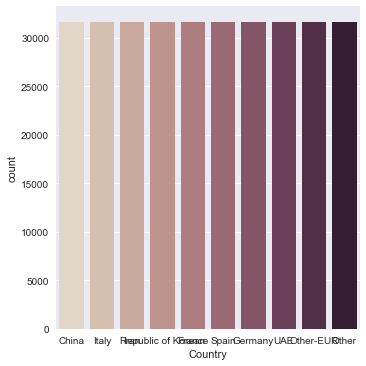

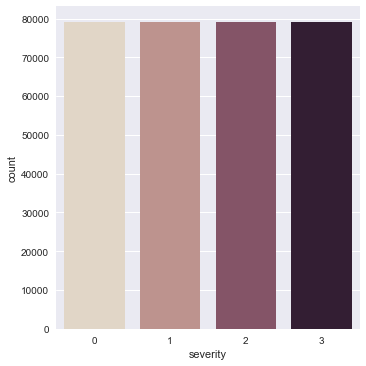

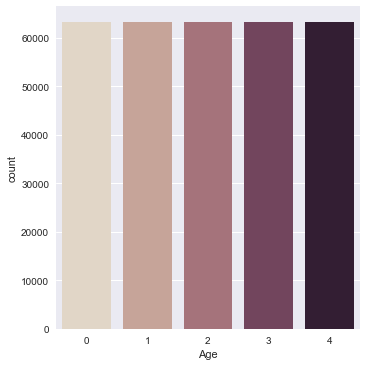

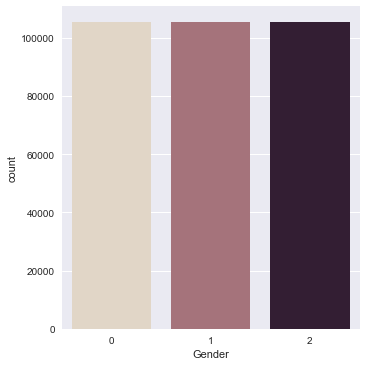

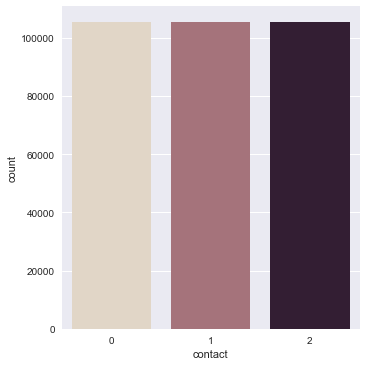

In [8]:
for col in df.columns:
       sns.catplot(x=col, kind="count", palette="ch:.25", data=df) 

Skontrolovanie zastúpenia jednotlivých vekových kategórii

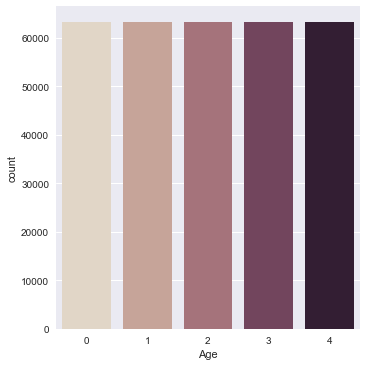

In [9]:
sns.catplot(x="Age", kind="count", palette="ch:.25", data=df)

Skontrolovanie zastúpenia jednotlivých závažností

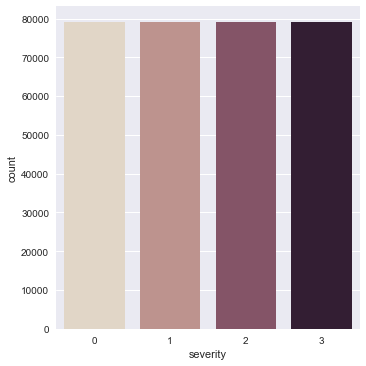

In [10]:
sns.catplot(x="severity", kind="count", palette="ch:.25", data=df)


Skontrolovanie zastúpenia jednotlivých pohlavií

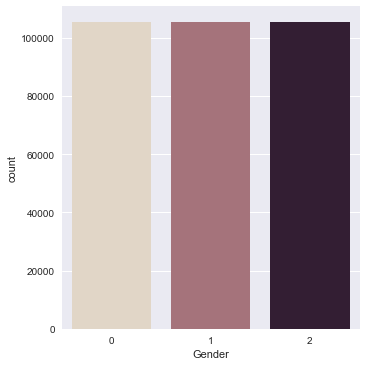

In [11]:
sns.catplot(x="Gender", kind="count", palette="ch:.25", data=df)

In [12]:
corr_data = df[['Fever',
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'Diarrhea',
 'None_Experiencing',
 'contact',
    'severity',
    'Gender']]


Vizualizácia korelácie

<AxesSubplot:>

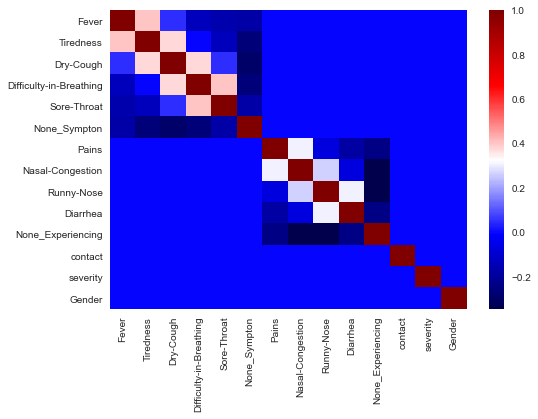

In [13]:
cor = corr_data.corr()
sns.heatmap(cor, cmap="seismic")

Vybranie stĺpcov ktoré chcem použiť
Rozdelenie dát na trénovacie a testovacie v 3:7

In [14]:
X = df[['Fever',
        'Tiredness',
        'Dry-Cough',
        'Difficulty-in-Breathing',
        'Sore-Throat',
        'None_Sympton',
        'Pains',
        'Nasal-Congestion',
        'Runny-Nose',
        'Diarrhea',
        'None_Experiencing',
        'contact',
        'Age',  
        'Gender'      
 ]]
y = df[[ 'Severity_Severe'
 ]]
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size)

Využívame viacvrstvový perceptrón
Aktivačnú funkciu využívam relu, pretože s inými sa nedosahovala iná presnosť.
Zvolil som 2 skryté vrstvy. V 1. vrstve som zvolil 6 a v 2. 3 neuróny na základe:<br>
geometrického pyramidového pravidla<br>
r = (nbrINP/nbrOUT)^(1/3)<br>
nbrHID1 = nbrOUT*(r^2) – počet neurónov v 1. skrytej vrstve<br>
nbrHID2 = nbrOUT*r  – počet neurónov v 2. skrytej vrstve<br>
Zdroj:
str.7
https://core.ac.uk/download/pdf/299806673.pdf

In [15]:
modelmlp=MLPClassifier(activation='relu',solver='adam',alpha=0.001,hidden_layer_sizes=(6,3),max_iter=10000)

In [16]:
print(modelmlp.fit(X_train,y_train))
print("y_train úspešnosť: %f" % modelmlp.score(X_train, y_train))
print("y_test úspešnosť: %f" % modelmlp.score(X_test, y_test))

C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(6, 3), max_iter=10000)
y_train úspešnosť: 0.750149
y_test úspešnosť: 0.749653


In [17]:
modelmlp.predict_proba(X_test)

array([[0.74616513, 0.25383487],
       [0.7471215 , 0.2528785 ],
       [0.74341889, 0.25658111],
       ...,
       [0.75530412, 0.24469588],
       [0.7450041 , 0.2549959 ],
       [0.7458545 , 0.2541455 ]])

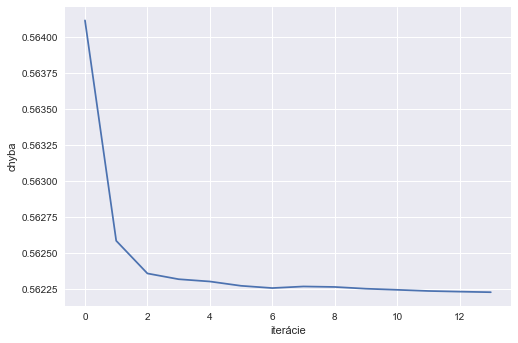

In [18]:
plt.xlabel('iterácie')
plt.ylabel('chyba')
plt.plot(modelmlp.loss_curve_)

In [19]:
modelmlp.loss_curve_

[0.5641189810677286,
 0.5625835719981206,
 0.5623556835125593,
 0.5623156238100405,
 0.5622997245164763,
 0.5622696345100006,
 0.5622539985811678,
 0.5622650359499897,
 0.5622616046644788,
 0.5622494285216437,
 0.5622416824306118,
 0.5622336056114755,
 0.5622290174699072,
 0.5622250281172337]

In [20]:
modelmlp.out_activation_

'logistic'

In [21]:
y_pred = modelmlp.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     71247
           1       0.00      0.00      0.00     23793

    accuracy                           0.75     95040
   macro avg       0.37      0.50      0.43     95040
weighted avg       0.56      0.75      0.64     95040



C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
modelmlp.best_loss_

0.5622250281172337

In [23]:
modelmlp.coefs_

[array([[-0.17390283, -0.40573371,  0.01275015,  0.2768429 ,  0.23125693,
          0.06027384],
        [-0.26485566, -0.0388976 ,  0.11984428,  0.09751418,  0.31849633,
          0.2679679 ],
        [ 0.22040154, -0.31003189,  0.13979254,  0.0094668 ,  0.15842544,
          0.04092851],
        [-0.43401103,  0.22567872, -0.02765295, -0.19083689, -0.01487393,
          0.14209661],
        [ 0.06936466,  0.02583789,  0.14615353,  0.07747024, -0.46300542,
         -0.29567937],
        [-0.18591858,  0.13086588,  0.21994771, -0.01104897, -0.01039476,
         -0.32827111],
        [ 0.14622624, -0.02615274, -0.06086165, -0.32478807, -0.22784933,
         -0.21554394],
        [-0.4292447 ,  0.45611242, -0.09843982, -0.04747746, -0.35711964,
         -0.4397711 ],
        [-0.14541318,  0.2450487 , -0.07344284, -0.28232006,  0.46473037,
         -0.43846668],
        [ 0.11224457,  0.32952732, -0.07228979,  0.06172686, -0.39928106,
         -0.44122653],
        [ 0.05080786,  0.01355

Vizualizácia použitej neurónovej siete

In [24]:
network_structure = np.hstack(([X.shape[1]], np.asarray(modelmlp.hidden_layer_sizes), [y.shape[1]]))

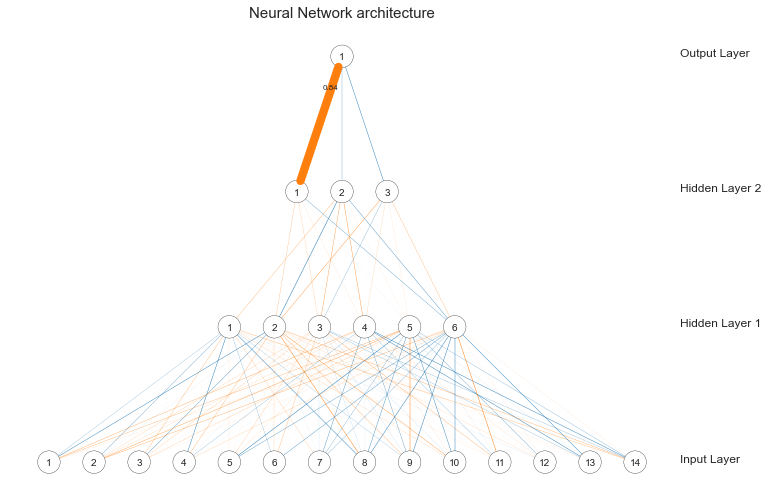

In [25]:
network=VisNN.DrawNN(network_structure, modelmlp.coefs_)
network.draw()

Vyskúšal som aj klasifikovať do 4 závažností ale presnosť bola veľmi nízka cca 0.25

Vybranie stĺpcov ktoré chcem použiť
tentokrát chceme určiť druh závažnosti zo 4 kategórií

In [26]:
X2 = df[['Fever',
         'Tiredness',
         'Dry-Cough',
         'Difficulty-in-Breathing',
         'Sore-Throat',
         'None_Sympton',
         'Pains',
         'Nasal-Congestion',
         'Runny-Nose',
         'Diarrhea',
         'None_Experiencing',
         'contact',
         'Age',        
         'Gender'      
 ]]
y2 = df[[ 'severity']]
test_data_size = 0.3
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = test_data_size)


In [27]:
modelmlp2=MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=(6,3),max_iter=10000)

In [28]:
print(modelmlp2.fit(X2_train,y2_train))
print("y2_train úspešnosť: %f" % modelmlp2.score(X2_train, y2_train))
print("y2_test úspešnosť: %f" % modelmlp2.score(X2_test, y2_test))

C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(6, 3), max_iter=10000)
y2_train úspešnosť: 0.250753
y2_test úspešnosť: 0.248243


In [29]:
y2_pred = modelmlp2.predict(X2_test)

print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     23852
           1       0.21      0.00      0.00     23851
           2       0.00      0.00      0.00     23728
           3       0.25      1.00      0.40     23609

    accuracy                           0.25     95040
   macro avg       0.11      0.25      0.10     95040
weighted avg       0.11      0.25      0.10     95040



C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


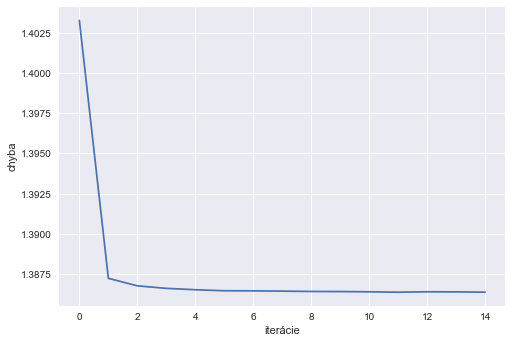

In [30]:
plt.xlabel('iterácie')
plt.ylabel('chyba')
plt.plot(modelmlp2.loss_curve_)

Podľa príznakov:<br>
    'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton'<br>
    Určiť či bude mať človek:
        'Fever'

In [31]:
X3 = df[[
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
        ]]
y3 = df[['Fever']]
test_data_size = 0.3
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = test_data_size)
train_data = pd.concat([X3_train, y3_train], axis = 1)
test_data = pd.concat([X3_test, y3_test], axis = 1)

In [32]:
modelmlp3=MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=(3,2),max_iter=10000)

In [33]:
print(modelmlp3.fit(X3_train,y3_train))
print("y3_train úspešnosť: %f" % modelmlp3.score(X3_train, y3_train))
print("y3_test úspešnosť: %f" % modelmlp3.score(X3_test, y3_test))

C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(3, 2), max_iter=10000)
y3_train úspešnosť: 0.687568
y3_test úspešnosť: 0.687342


In [34]:
y3_pred = modelmlp3.predict(X3_test)

print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81     65325
           1       0.00      0.00      0.00     29715

    accuracy                           0.69     95040
   macro avg       0.34      0.50      0.41     95040
weighted avg       0.47      0.69      0.56     95040



C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
modelmlp3.best_loss_

0.621041634031546

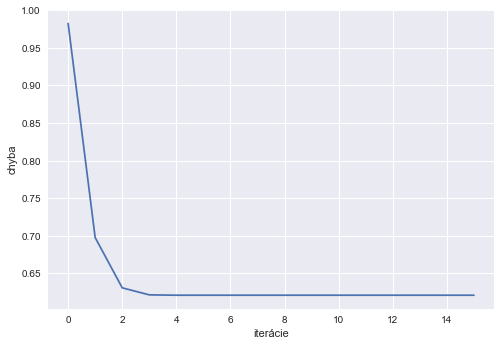

In [36]:
plt.xlabel('iterácie')
plt.ylabel('chyba')
plt.plot(modelmlp3.loss_curve_)

Podľa príznakov:<br>
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'None_Experiencing'<br>
Určiť či bude mať človek: 'Diarrhea'

In [37]:
X4 = df[[
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'None_Experiencing'
 ]]
y4 = df[[ 'Diarrhea'
 ]]
test_data_size = 0.3
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = test_data_size)
train_data = pd.concat([X4_train, y4_train], axis = 1)
test_data = pd.concat([X4_test, y4_test], axis = 1)

In [38]:
modelmlp4=MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=(3,2),max_iter=10000)

In [39]:
print(modelmlp4.fit(X4_train,y4_train))
print("y4_train úspešnosť: %f" % modelmlp4.score(X4_train, y4_train))
print("y4_train úspešnosť: %f" % modelmlp4.score(X4_test, y4_test))

C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(3, 2), max_iter=10000)
y4_train úspešnosť: 0.637058
y4_train úspešnosť: 0.634743


In [40]:
y4_pred = modelmlp4.predict(X4_test)

print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78     60326
           1       0.00      0.00      0.00     34714

    accuracy                           0.63     95040
   macro avg       0.32      0.50      0.39     95040
weighted avg       0.40      0.63      0.49     95040



C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
modelmlp4.best_loss_

0.6551028357062448

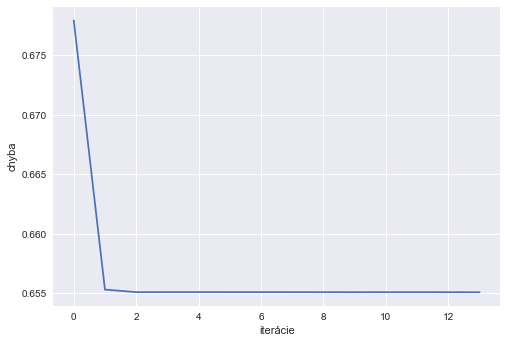

In [42]:
plt.xlabel('iterácie')
plt.ylabel('chyba')
plt.plot(modelmlp4.loss_curve_)